In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import math

In [2]:
class Gaussian:
    def __init__(self, width, amplitude, x0):
        self.width = width
        self.amplitude = amplitude
        self.x0 = x0
        
    def __call__(self, x):
        A = self.amplitude
        x0 = self.x0
        sigma = self.width
        return A*np.exp(-((x[0]-x0[0])**2 + (x[1]-x0[1])**2)/sigma**2)

In [3]:
class propagate:
    def __init__(self, Lx, Nx, Ly, Ny, Lz, Nz, k, K, init_f, non_f):
        self.Lx = Lx
        self.Nx = Nx
        self.Ly = Ly
        self.Ny = Ny
        self.Lz = Lz
        self.Nz = Nz
        self.k = k
        self.K = K
        self.non_f = non_f
        
        #We can reduce the code by using step parameter in linspace
        
        self.dz = Lz/Nz
        self.dx = Lx/Nx
        self.dy = Ly/Ny
        self.matrix = np.zeros([Nz, 2*Nx, 2*Ny])
        
        kx = 2*np.pi*np.fft.fftfreq(2*Nx, d=self.dx)
        ky = 2*np.pi*np.fft.fftfreq(2*Ny, d=self.dy)
        self.kx = kx
        self.ky = ky
        kxy2 = np.zeros([2*Nx, 2*Ny])
        
        for i in range(2*Nx):
            for j in range(2*Ny):
                kxy2[i][j] = kx[i]**2 + ky[j]**2
        self.kxy2 = kxy2
                
        self.x = np.linspace(-Lx, Lx, 2*Nx)
        self.y = np.linspace(-Ly, Ly, 2*Ny)
        E = np.zeros([2*Nx, 2*Ny])
        
        #intialisation
        for i in range(2*Nx):
            for j in range(2*Ny):
                x0 =(2*Lx)/(2*Nx-1)*i -Lx
                x1 =(2*Ly)/(2*Ny-1)*j -Ly
                #x0 =(2*Lx)/(2*Nx-1)*i
                #x1 =(2*Ly)/(2*Ny-1)*j
                E[i][j] = init_f([x0, x1])
        
        self.E = E
        #self.matrix[0,:,:] = E
        
    def evolution(self):
        list_z =[]
        list_z1 = []
        E = self.E*(1+1j*0)
        list_z.append(np.abs(E)**2)
        list_z1.append(E)
        
        for l in range(Nz-1):
            '''
            #solve for non-linear
            c = np.exp(1j*self.non_f(E)*self.dz)*E
            c = np.fft.fft2(c)
            c *= np.exp(-1j/(2*self.k)*(self.kxy2)*self.dz)
            E = np.fft.ifft2(c)
            
            '''
            #Linear
            #Ek = np.fft.fft2(E)
            #Ek *= np.exp(-1j/(2*self.k)*(self.kxy2)*self.dz)
            #E = np.fft.ifft2(Ek)
            #print(np.abs(E)/list_z[-1])
        
            #Non-linear
            #print(non_f(E)*self.dz/E)
            #if l == 0: E += non_f(E)*self.dz
            #else: E += (3/2)*non_f(list_z1[-1])*self.dz - (1/2)*non_f(list_z1[-2])*self.dz
            E += non_f(E)*self.dz
            
            #Putting into list
            list_z.append(np.abs(E)**2)
            list_z1.append(E)
        
        list_z = np.asarray(list_z)
        list_z1 = np.asarray(list_z1)
        self.matrix = list_z
        self.matrix2 = list_z1
        

In [4]:
cross = 5.1*1e-24
light = 3*1e8
lamb = 790*1e-9
omega = 2*np.pi*light/lamb
tau = 3.5*1e-13
beta = 6.5*1e-104
hbar = 6.62*1e-34
tp = 85*1e-15
#f = 1/2
f = 0
n2 = 5.57*1e-23
k = 2*np.pi/lamb
K = 7

#const1 = -cross/2*(1 + 1j*omega*tau)*beta/(K*hbar*omega)*tp*(np.pi/8*K)**(1/2)
const2 = -beta/2
#const3 = 1j*omega/light*(1-f)*n2

const1 = 0
#const2 = 0
const3 = 0

#normaliser
const1 = const1*(10**8)**(2*K)
const2 = const2*(10**8)**(2*K-2)
const3 = const3*(10**8)**2

print(const1, const2, const3)
def non_f(E):
    #const1 = -cross/2*(1 + omega*tau)*beta/(K*hbar*omega)*tp/(8*K)**(1/2)
    #const2 = -beta/2
    #const3 = 1j*omega/light*(1-f)*n2
    return const1*E*np.abs(E)**(2*K) + const2*E*np.abs(E)**(2*K - 2) + const3*E*np.abs(E)**2


0 -3.25e-08 0


In [5]:
w0 = 0.7*1e-3
Pcr = 1.7*1e9
p = 4
Pin = p*Pcr
AMP = (2*Pin/(math.pi*w0**2))**(1/2)
x0 = [0., 0.]

AMP = AMP*1e-8     #normaliser
gauss = Gaussian(w0, AMP, x0)

Lx = 1600*1e-6
Nx = 128
Ly = 1600*1e-6
Ny = 128
Lz = 2.0
Nz = 512

init_f = gauss

laser = propagate(Lx, Nx, Ly, Ny, Lz, Nz, k, K, init_f, non_f)
laser.evolution()

#for i in range(25):
#    fig, ax = plt.subplots()
#    mesh = ax.pcolormesh(Pro.x, Pro.y, Pro.matrix[i*10])
#    ax.set_xlabel('x')
#    ax.set_ylabel('y')
#    plt.colorbar(mesh, ax=ax)
#    fig.show()



0
1
153
486


/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


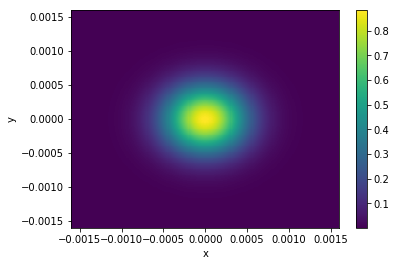

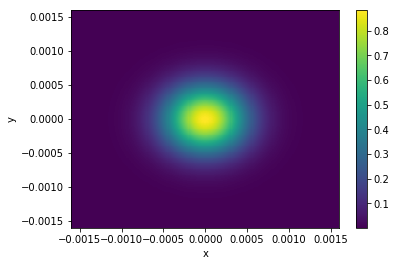

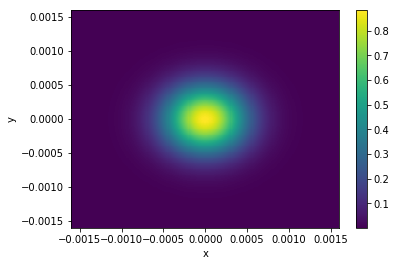

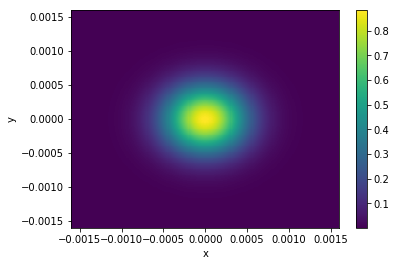

In [6]:
for i in [0, 0.004, 0.6, Lz-0.1]:
    fig, ax = plt.subplots()
    pic = int(i/laser.dz)
    print(pic)
    mesh = ax.pcolormesh(laser.x, laser.y, laser.matrix[pic])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.colorbar(mesh, ax=ax)
    fig.show()

In [14]:
I0 = laser.matrix[0]      #I0: I at z = 0
K = 7
def bet_analytic(z):
    return I0/(1 + (K-1)*beta*I0**(K-1)*z)**(1/(K-1))

Position: z =  0
Position: z =  0.6
Position: z =  0.83
Position: z =  1.9


/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


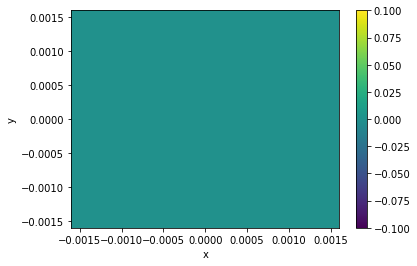

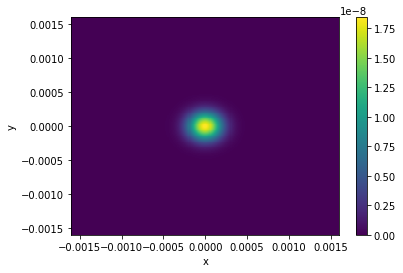

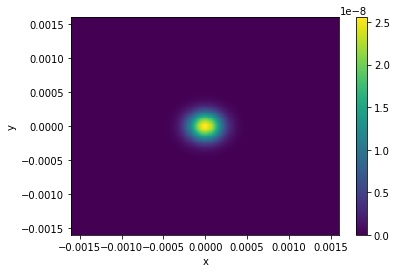

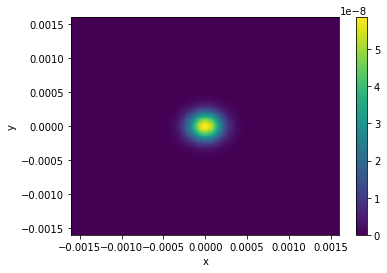

In [15]:
x = np.linspace(-Lx, Lx, 2*Nx)
y = np.linspace(-Ly, Ly, 2*Ny)

for z in [0, 0.6, 0.83, Lz-0.1]:
    print("Position: z = ",  z)
    pic = int(z/laser.dz)
    fig, ax = plt.subplots()
    mesh = ax.pcolormesh(x, y, (bet_analytic(z) - laser.matrix[pic])/bet_analytic(z))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.colorbar(mesh, ax=ax)
    fig.show()

Position: z =  0
Mean:  0.0
Standard deviation:  0.0
------------
Position: z =  0.6
Mean:  -2.29608117367e-10
Standard deviation:  1.43804919525e-09
------------
Position: z =  0.83
Mean:  -3.18149805645e-10
Standard deviation:  1.99259101087e-09
------------
Position: z =  1.9
Mean:  -7.29343374421e-10
Standard deviation:  4.56792053826e-09
------------


/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


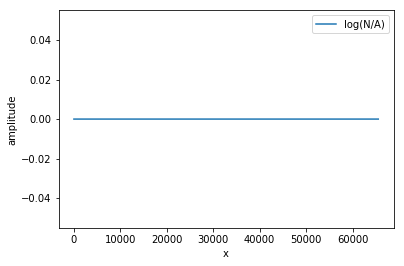

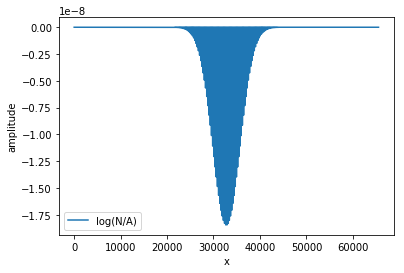

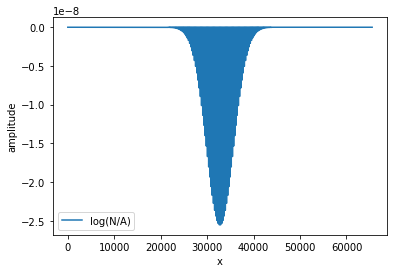

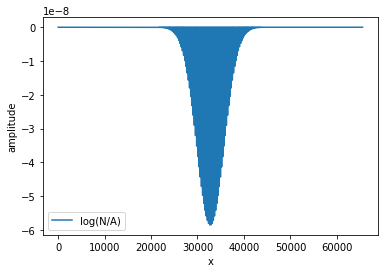

In [16]:
for z in [0, 0.6, 0.83, Lz-0.1]:
    print("Position: z = ",  z)
    pic = int(z/laser.dz)
    A = (np.log(laser.matrix[pic]/bet_analytic(z))).flatten()
    #print(A.size)
    #print("Position: ", i*laser.dz)
    print("Mean: ", np.mean(A))
    print("Standard deviation: ", np.std(A))
    print("------------")
    x = np.linspace(0, 2*Nx*2*Ny, 2*Nx*2*Ny)
    fig, ax = plt.subplots()
    ax.plot(x, A, label = 'log(N/A)')
    ax.set_xlabel('x')
    ax.set_ylabel('amplitude')
    #plt.xlim(100000, 100512)
    ax.legend()
    fig.show()

Position: z =  0
Mean:  0.0
Standard deviation:  0.0
------------
Position: z =  0.6
Mean:  -2.29608117367e-10
Standard deviation:  1.43804919525e-09
------------
Position: z =  0.83
Mean:  -3.18149805645e-10
Standard deviation:  1.99259101087e-09
------------
Position: z =  1.0
Mean:  -3.84180894575e-10
Standard deviation:  2.40614760388e-09
------------


/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


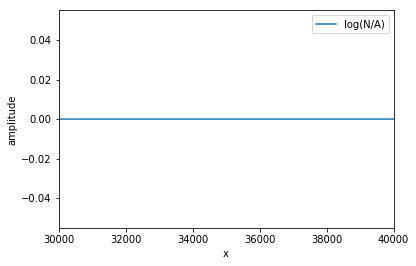

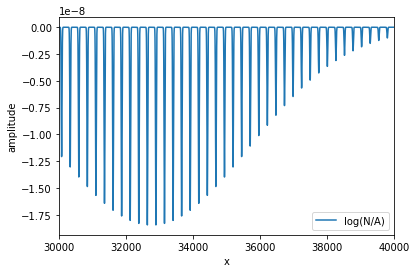

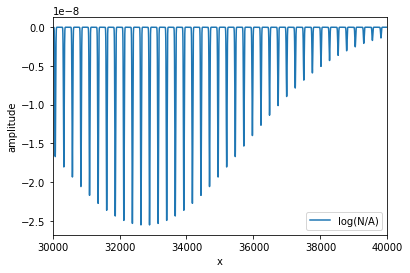

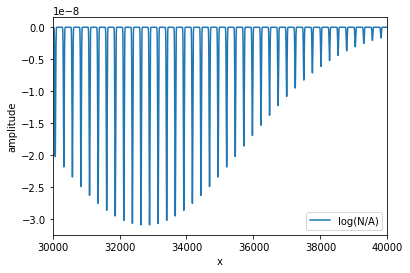

In [21]:
for z in [0, 0.6, 0.83, Lz-1]:
    print("Position: z = ",  z)
    pic = int(z/laser.dz)
    A = (np.log(laser.matrix[pic]/bet_analytic(z))).flatten()
    #print(A.size)
    #print("Position: ", i*laser.dz)
    print("Mean: ", np.mean(A))
    print("Standard deviation: ", np.std(A))
    print("------------")
    x = np.linspace(0, 2*Nx*2*Ny, 2*Nx*2*Ny)
    fig, ax = plt.subplots()
    ax.plot(x, A, label = 'log(N/A)')
    ax.set_xlabel('x')
    ax.set_ylabel('amplitude')
    plt.xlim(30000, 40000)
    ax.legend()
    fig.show()

Position: z =  0
Mean:  0.0
Standard deviation:  0.0
------------
Position: z =  0.6
Mean:  -2.29608117367e-10
Standard deviation:  1.43804919525e-09
------------
Position: z =  0.83
Mean:  -3.18149805645e-10
Standard deviation:  1.99259101087e-09
------------
Position: z =  1.9
Mean:  -7.29343374421e-10
Standard deviation:  4.56792053826e-09
------------


/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


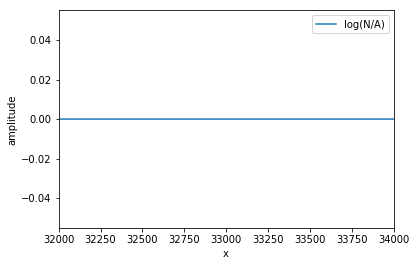

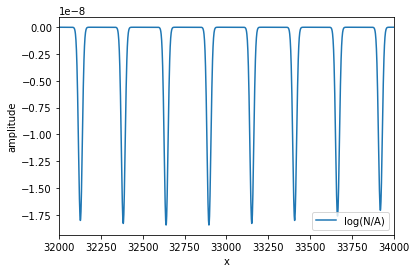

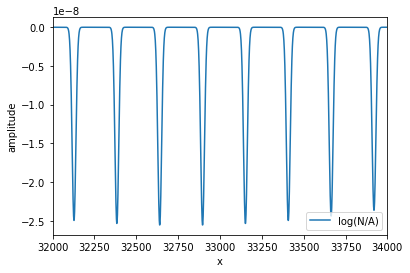

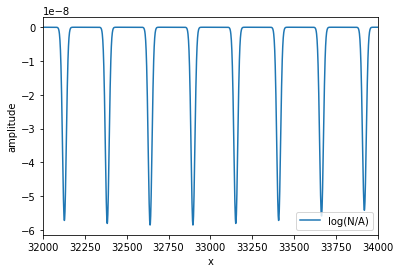

In [23]:
for z in [0, 0.6, 0.83, Lz-0.1]:
    print("Position: z = ",  z)
    pic = int(z/laser.dz)
    A = (np.log(laser.matrix[pic]/bet_analytic(z))).flatten()
    #print(A.size)
    #print("Position: ", i*laser.dz)
    print("Mean: ", np.mean(A))
    print("Standard deviation: ", np.std(A))
    print("------------")
    x = np.linspace(0, 2*Nx*2*Ny, 2*Nx*2*Ny)
    fig, ax = plt.subplots()
    ax.plot(x, A, label = 'log(N/A)')
    ax.set_xlabel('x')
    ax.set_ylabel('amplitude')
    plt.xlim(32000, 34000)
    ax.legend()
    fig.show()

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


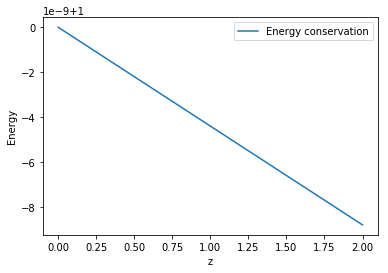

In [12]:
list_e = []
for i in range(Nz):
    E = np.sum(laser.matrix[i])
    list_e.append(E)
list_e = np.asarray(list_e)
norm = list_e[0]
x = np.linspace(0, Lz, Nz)
fig, ax = plt.subplots()
ax.plot(x, list_e/norm, label = 'Energy conservation')
ax.set_xlabel('z')
ax.set_ylabel('Energy')
ax.legend()
#plt.ylim(4.5, 5.5)
fig.show()

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


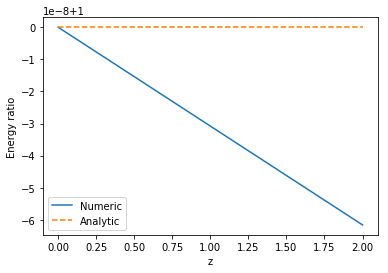

In [47]:
list_emax = []
list_anamax = []
x = np.linspace(0, Lz, Nz)
for i in range(Nz):
    E = np.max(laser.matrix[i])
    list_emax.append(E)
    E = np.max(bet_analytic(x[i]))
    list_anamax.append(E)
    
list_emax = np.asarray(list_emax)
list_anamax = np.asarray(list_anamax)

fig, ax = plt.subplots()
ax.plot(x, list_emax/list_emax[0], label = 'Numeric')   
ax.plot(x, list_anamax/list_anamax[0], label = 'Analytic', linestyle= 'dashed')
ax.set_xlabel('z')
ax.set_ylabel('Energy ratio')
ax.legend()
#plt.ylim(0.5, 1.5)
fig.show()